## Apply k-means and hierarchical clustering on a dataset such as customer segmentation, visualise the resulting clusters, and validate the results using silhouette scores.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

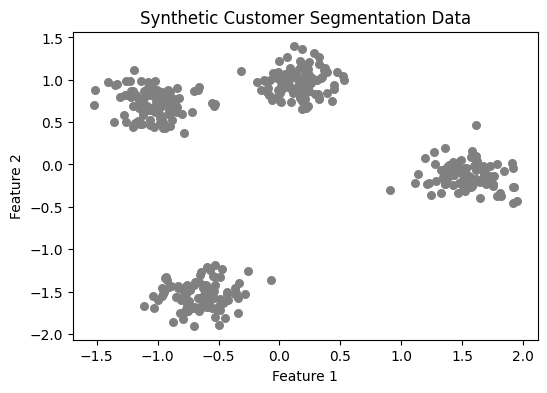

In [2]:
# Generate synthetic dataset (like customer segmentation)
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=1.0, random_state=42)
X = StandardScaler().fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], s=30, c='gray')
plt.title("Synthetic Customer Segmentation Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

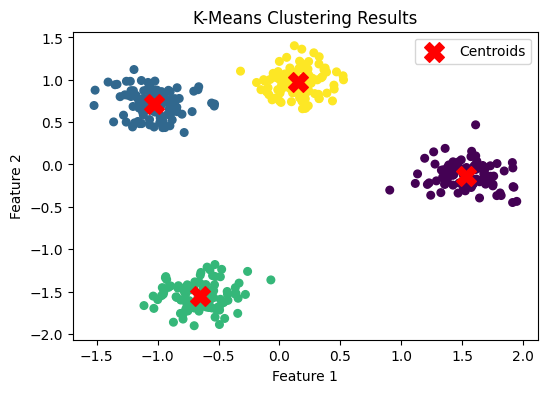

In [3]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [4]:
# Evaluate with silhouette score
sil_kmeans = silhouette_score(X, y_kmeans)
print(f"✅ Silhouette Score (K-Means): {sil_kmeans:.3f}")

✅ Silhouette Score (K-Means): 0.800


Hierarchical Clustering

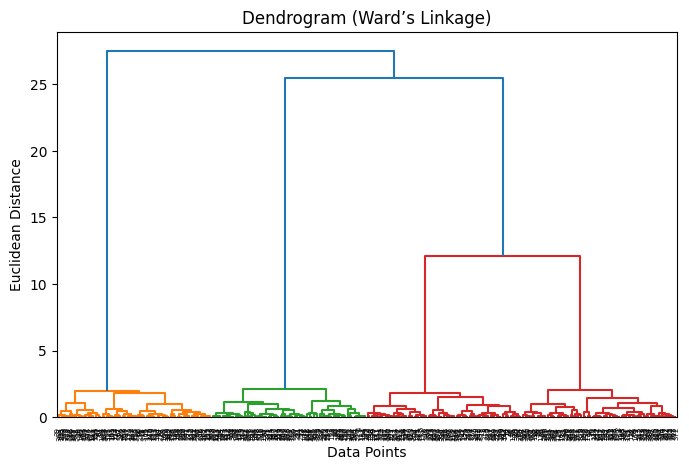

In [5]:
# Dendrogram to find optimal clusters
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram (Ward’s Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

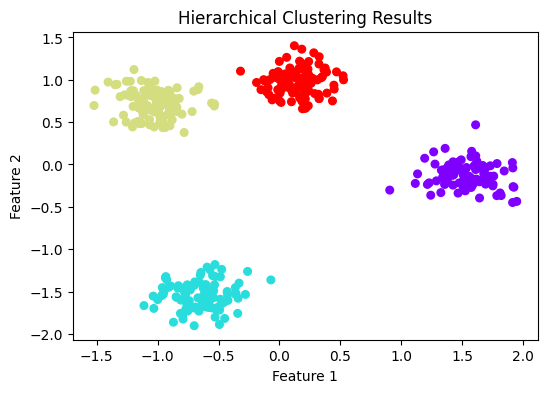

✅ Silhouette Score (Hierarchical): 0.800


In [7]:
# Fit Agglomerative Clustering
hier = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hier = hier.fit_predict(X)

plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y_hier, s=30, cmap='rainbow')
plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

sil_hier = silhouette_score(X, y_hier)
print(f"✅ Silhouette Score (Hierarchical): {sil_hier:.3f}")

/tmp/ipython-input-527017641.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Silhouette Score', data=results, palette='coolwarm')


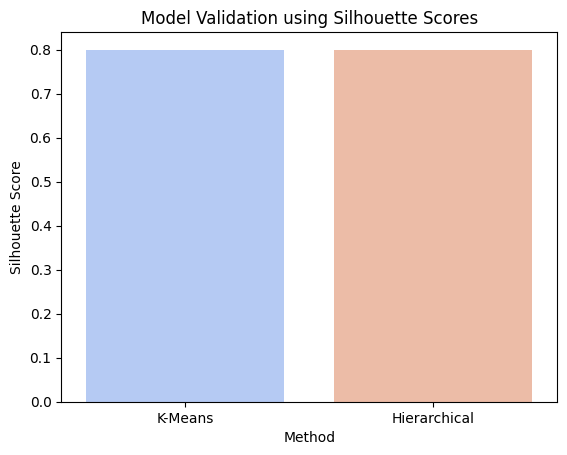

In [8]:

results = pd.DataFrame({
    'Method': ['K-Means', 'Hierarchical'],
    'Silhouette Score': [sil_kmeans, sil_hier]
})

sns.barplot(x='Method', y='Silhouette Score', data=results, palette='coolwarm')
plt.title("Model Validation using Silhouette Scores")
plt.show()